#TITANIC PREDICTION

##IMPORT NECCESARY MODELS / TEST DATASETS

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
#Importing train data sets
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/test.csv')

##CLEANED DATA
<P>DROPED ALL CELLS WITH EMPYT VALUES</p>

In [ ]:
#numebr of empty cells in each column
A = df_train['Age'].isnull().sum()  # Changed df to dfv
B = df_train['Pclass'].isnull().sum()  # Changed df to dfv
C = df_train['Embarked'].isnull().sum()  # Changed df to dfv
D = df_train['Cabin'].isnull().sum()  # Changed df to dfv
E = df_train['Name'].isnull().sum()  # Changed df to dfv
F = df_train['Ticket'].isnull().sum()  # Changed df to dfv
G = df_train['Survived'].isnull().sum()  # Changed df to dfv
H = df_train['SibSp'].isnull().sum()  # Changed df to dfv
I = df_train['Parch'].isnull().sum()  # Changed df to dfv
J = df_train['Fare'].isnull().sum()  # Changed df to dfv
HE = (A,B,C,D,E,F,G,H,I,J)
HE

(177, 0, 2, 687, 0, 0, 0, 0, 0, 0)

In [ ]:
clean_df_train = df_train.dropna()
clean_df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
clean_df_train.head(1)
# clean_dfv['Survived']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
#<p>"PassengerId" column containing the IDs of each passenger from test.csv.
#"Survived" column (that you will create!) with a "1" for the rows where you think the passenger survived, and a "0" where you predict that the passenger died.
clean_df_test = df_test.dropna()
clean_df_test
# clean_df_test['Survived'] = 0
clean_df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


###DATA SPLITING TRAIN

In [ ]:
#FEATURES OF PREDICTOR
y_train = clean_df_train['Survived']
x_train = clean_df_train.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
x_train['Sex'] = clean_df_train['Sex'].map({'male': 0, 'female': 1})
x_train['Embarked'] = clean_df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# f'{x_train.shape}, {x_test.shape}, {y_train.shape}, {y_test.shape}'
# y_test.head()

##MODEL TRAINING USING LOGICAL REGRESSION MODEL

In [ ]:
model_selection = make_pipeline(StandardScaler(), LogisticRegression(max_iter=600, solver='liblinear'))
model_selection.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=600, solver='liblinear'))])

##PREDICTION

In [ ]:
predictions = model_selection.predict(x_test)
MSerror = accuracy_score(y_test, predictions)
r2_score = model_selection.score(x_test, y_test)
print(f'Mean Squared Error: {MSerror}')
print(f'R2 Score: {r2_score}')

Mean Squared Error: 0.7297297297297297
R2 Score: 0.7297297297297297


In [ ]:
# Access the LogisticRegression estimator within the pipeline using named_steps
print("Number of iterations:", model_selection.named_steps['logisticregression'].n_iter_)

Number of iterations: [5]


##PLOTING

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
# plt.scatter(range(len(predictions)), predictions, color='red', label='Predictions', marker='x')
# plt.xlabel('Data Point Index')
# plt.ylabel('Survived (1) or Not (0)')
# plt.title('Actual vs. Predicted Survival')
# plt.legend()
# plt.grid(True)
# plt.show()

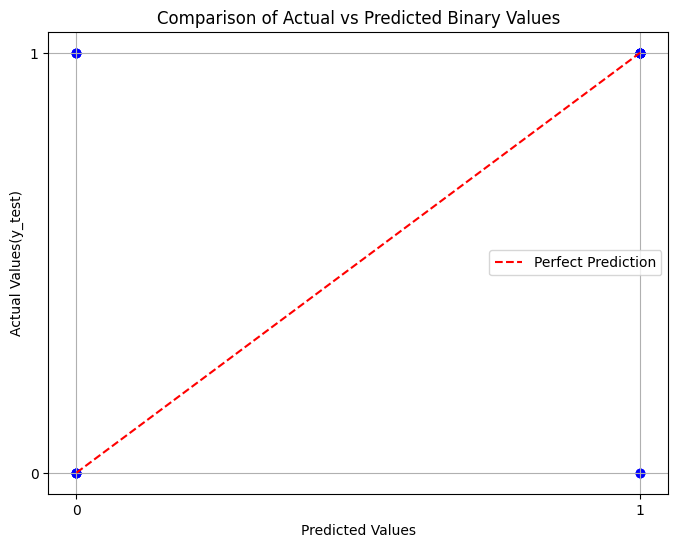

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to compare y_test and predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6)
plt.xticks([0, 1])  # X-axis for predicted values (0 and 1)
plt.yticks([0, 1])  # Y-axis for actual values (0 and 1)
plt.title('Comparison of Actual vs Predicted Binary Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values(y_test)')
plt.grid(True)

# Add perfect prediction line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.show()

##TEST PREDICTION

In [ ]:
xclean_test = clean_df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
xclean_test['Sex'] = clean_df_test['Sex'].map({'male': 0, 'female': 1})
xclean_test['Embarked'] = clean_df_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
# clean_df_test
xclean_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
#test dataset preedictions
test_predictions = model_selection.predict(xclean_test)
test_predictions_df = pd.DataFrame(test_predictions, columns=['Survived'])
test_predictions_df.describe()
# test_predictions_df.

,Survived
count,87.000000
mean,0.747126
std,0.437179
min,0.000000
25%,0.500000
50%,1.000000
75%,1.000000
max,1.000000


compare

In [ ]:
# df_compare = pd.concat([clean_df_test['PassengerId'], test_predictions_df], axis=1)
# df_compare.head(80)
clean_df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,1.137931,39.247126,0.597701,0.482759,98.109198
std,126.751901,0.435954,15.218730,0.637214,0.860801,88.177319
min,904.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,986.000000,1.000000,27.000000,0.000000,0.000000,35.339600
50%,1094.000000,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1216.000000,1.000000,50.000000,1.000000,1.000000,135.066650
max,1306.000000,3.000000,76.000000,3.000000,4.000000,512.329200


In [ ]:
test_predictions_df
# clean_df_test['PassengerId']

,Survived
0,1
1,1
2,1
3,1
4,0
...,...
82,1
83,1
84,0
85,1


In [ ]:
df_compare = pd.concat([clean_df_test['PassengerId'], test_predictions_df], axis=1)
df_compare
# df_compare1 = df_compare.dropna()
df_compare1.head()

NameError: name 'df_compare1' is not defined